## Модель, предсказывающая стоимость недвижимости

In [2]:
#Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Скачиваем данные
path = 'train.csv'
path2 = 'test.csv'
df_train = pd.read_csv(path, index_col = 0)
df_test = pd.read_csv(path2, index_col = 0)

In [5]:
# Целевой признак
target = df_train.SalePrice

In [6]:
# Обрабатываем весь датасет
df = df_train.drop(['SalePrice'], axis=1)
df = pd.concat([df, df_test]).reset_index(drop=True)

### Exploratory Data Analysis

In [7]:
#Посмотрим на размер данных
df.shape

(2919, 79)

In [8]:
#Чтобы посмотреть значения всех колонок
pd.set_option('display.max_columns', 80)

In [9]:
# Посмотрим на природу данных
df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
293,60,RL,NaN,16659,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosA,Norm,1Fam,2Story,7,7,1977,1994,Gable,CompShg,Plywood,Plywood,BrkFace,34.0,TA,TA,CBlock,TA,TA,No,ALQ,795.0,Unf,0.0,0.0,795.0,GasA,Fa,Y,SBrkr,1468,795,0,2263,1.0,0.0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1977.0,Fin,2.0,539.0,TA,TA,Y,0,250,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
2597,60,RL,NaN,11800,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,94.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,766.0,Unf,0.0,356.0,1122.0,GasA,Ex,Y,SBrkr,1146,1340,0,2486,1.0,0.0,3,1,5,1,Gd,10,Typ,1,Gd,BuiltIn,2003.0,Fin,2.0,452.0,TA,TA,Y,143,32,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
69,50,RL,81.0,15593,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,ClearCr,Norm,Norm,1Fam,1.5Fin,7,4,1953,1953,Gable,CompShg,BrkFace,AsbShng,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,603.0,Unf,0.0,701.0,1304.0,GasW,TA,Y,SBrkr,1304,983,0,2287,0.0,0.0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1953.0,Fin,2.0,667.0,TA,TA,Y,0,21,114,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
701,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,5,1969,1969,Hip,CompShg,HdBoard,HdBoard,BrkFace,168.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1164.0,1164.0,GasA,TA,Y,SBrkr,1164,0,0,1164,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1969.0,Unf,2.0,528.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2006,COD,Normal
2480,20,RL,NaN,11677,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,4,1966,1966,Gable,CompShg,HdBoard,HdBoard,BrkFace,442.0,TA,TA,CBlock,TA,TA,Av,Rec,249.0,BLQ,761.0,30.0,1040.0,GasA,TA,Y,SBrkr,1040,0,0,1040,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1966.0,RFn,1.0,264.0,TA,TA,Y,0,90,0,0,0,0,NaN,MnPrv,NaN,0,2,2007,WD,Normal


In [10]:
# Какие типы данных есть
df.dtypes.value_counts()

object     43
int64      25
float64    11
dtype: int64

In [11]:
# Сколько у нас пустых ячеек
df.isna().sum().sort_values(ascending=False).head(35)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
SaleType           1
BsmtFinSF1         1
KitchenQual        1
GarageCars         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
Electrical         1
BsmtFinSF2         1
TotRmsAbvGrd       0
dtype: int64

In [12]:
# Рзаделим столбцы на числовые и категориальные признаки
df.select_dtypes(['float64']).columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [13]:
# Числовые признаки 
## из описания данных поняли, что среди числовых есть категориальные
num_columns = ['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
               'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
               'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
               '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold',
               'LotFrontage', 'MasVnrArea', 'GarageYrBlt']

# Категориальные признаки 
cat_columns = df.columns.drop(num_columns).to_list()
pool_cat_columns = cat_columns

In [14]:
# Посмотим на тип данных категориальных признаков
df[cat_columns].dtypes.value_counts()

object     43
int64      10
float64     3
dtype: int64

In [15]:
# Логарифмируем SalePrice, так как проверяющая метрика RMSLE
target = np.log(target)

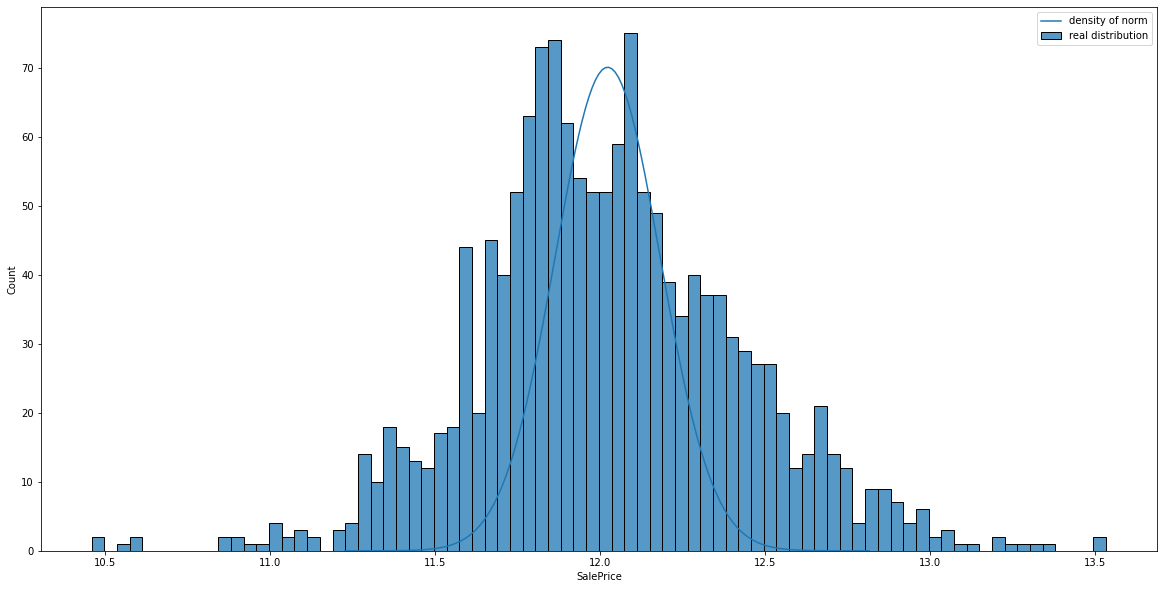

In [16]:
# Смотрим распределение SalePrice
## Нормальное с средним 12 и дисперсия 0.16

_, ax = plt.subplots(figsize = (20, 10))
sns.histplot(target, bins=80, label='real distribution'); 

mu = np.mean(target)
var = np.var(target)
x = np.arange(mu - 5*var, mu + 5*var, 0.01)

density = 28*st.norm(mu, var).pdf(x)

ax.plot(x, density, label = 'density of norm')
ax.legend()

In [17]:
# Проверка на нормальность распределения
st.shapiro(target)

ShapiroResult(statistic=0.9912067651748657, pvalue=1.1490678986092462e-07)

In [18]:
#Количество числовых и категориальных признаков
len(num_columns), len(cat_columns)

(23, 56)

In [19]:
#Заполняем пустые значения

df.LotFrontage = df.groupby('Neighborhood').LotFrontage.transform(lambda x: x.fillna(x.median()))

#Заполнение NA
df.MiscFeature.fillna('NA', inplace=True)
df.Utilities.fillna('NA', inplace=True)
df.PoolQC.fillna('NA', inplace=True)
df.Fence.fillna('NA', inplace=True)
df.FireplaceQu.fillna('NA', inplace=True)
df.Alley.fillna('NA', inplace=True)
df.MasVnrType.fillna('None', inplace=True)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    df[col] = df[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')


#Заполнение нулями
df.MasVnrArea.fillna(0.0,inplace=True)
df.BsmtFullBath.fillna(0.0,inplace=True)
df.BsmtHalfBath.fillna(0.0,inplace=True)
df.BsmtFinSF1.fillna(0,inplace=True)
df.BsmtFinSF2.fillna(0,inplace=True)
df.TotalBsmtSF.fillna(0,inplace=True)
df.BsmtUnfSF.fillna(0,inplace=True)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    df[col] = df[col].fillna(0)

#Заполнение модой
df.MSZoning.fillna(df.MSZoning.mode()[0],inplace=True)
df.Functional.fillna(df.Functional.mode()[0],inplace=True)
df.Functional.fillna(df.Functional.mode()[0],inplace=True)
df.SaleType.fillna(df.SaleType.mode()[0],inplace=True)
df.Exterior2nd.fillna(df.Exterior2nd.mode()[0],inplace=True)
df.Exterior1st.fillna(df.Exterior1st.mode()[0],inplace=True)
df.Exterior2nd.fillna(df.Exterior2nd.mode()[0],inplace=True)
df.Exterior1st.fillna(df.Exterior1st.mode()[0],inplace=True)
df.KitchenQual.fillna(df.KitchenQual.mode()[0],inplace=True)
df.Electrical.fillna('SBrkr', inplace=True)

#Правим типы колонок
df[['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']] = df[['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']].astype(int)

#Приводим года к нужной форме
year_columns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
df[year_columns] = df[year_columns].astype('int64')
df[df.GarageYrBlt == 0].GarageYrBlt = df.GarageYrBlt.median().round().astype('int64')

#### Рисуем очень много графиков

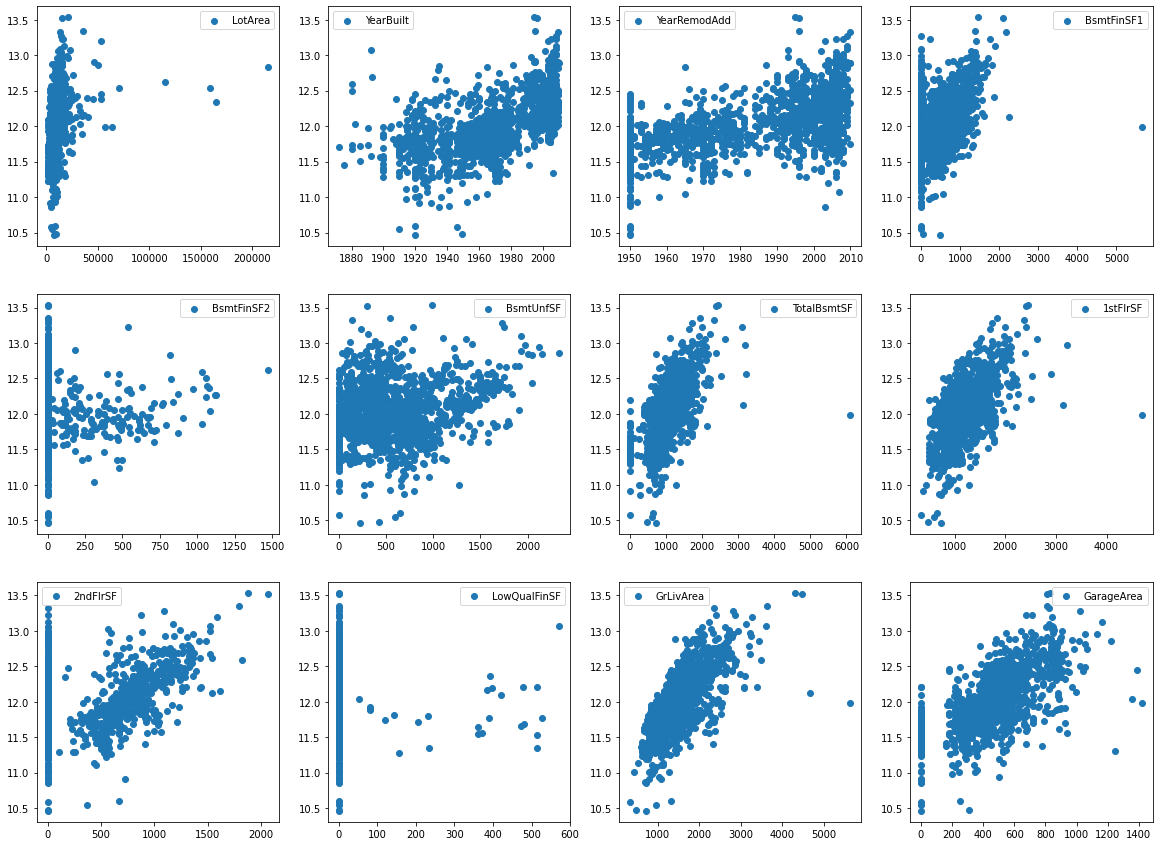

In [20]:
#Рисуем графики зависимости цены от числовых столбцов _1
_, ax = plt.subplots(3, 4, figsize = (20, 15))
for i in range(3):
    for j in range(4):
        n_col = i*4 + j
        ax[i][j].scatter(df[:1460].loc[:, num_columns].iloc[:, n_col], target, label = num_columns[n_col])
        ax[i][j].legend()

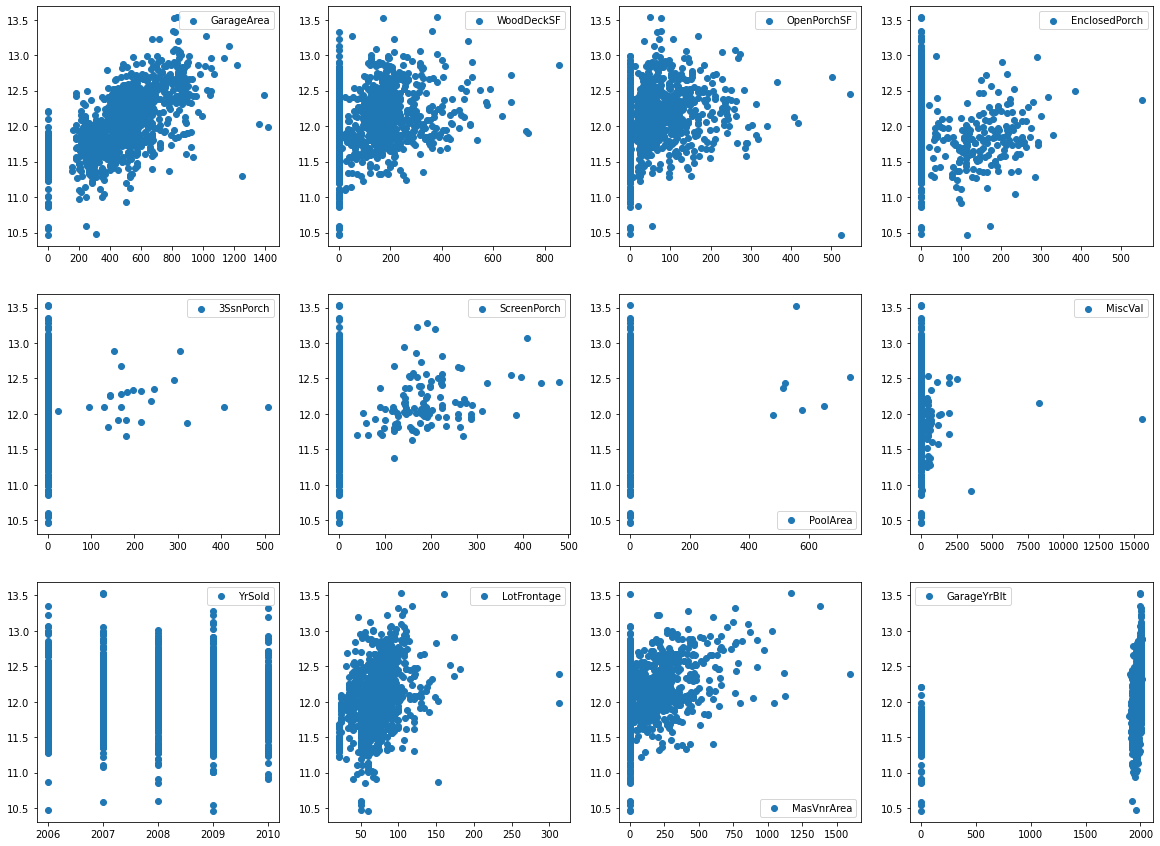

In [21]:
#Рисуем графики зависимости цены от числовых столбцов _2
_, ax = plt.subplots(3, 4, figsize = (20, 15))
for i in range(3):
    for j in range(4):
        n_col = 11+i*4 + j
        ax[i][j].scatter(df[:1460].loc[:, num_columns].iloc[:, n_col], target, label = num_columns[n_col])
        ax[i][j].legend()

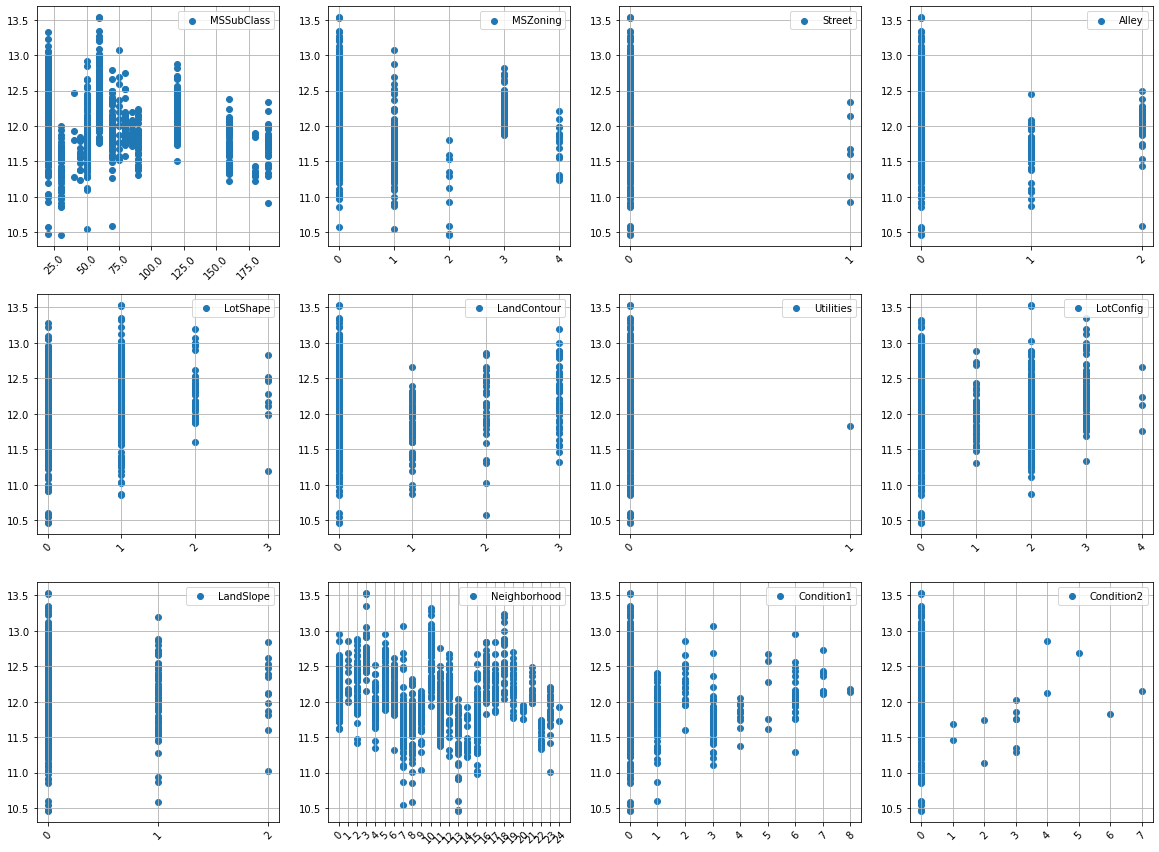

In [22]:
#Рисуем графики зависимости цены от категориальных столбцов _1
_, ax = plt.subplots(3, 4, figsize = (20, 15))
for i in range(3):
    for j in range(4):
        n_col = i*4 + j
        ax[i][j].scatter(df[:1460].loc[:, cat_columns].iloc[:, n_col], target, label = cat_columns[n_col])
        ax[i][j].set_xticklabels(ax[i][j].get_xticks(), rotation = 45)
        ax[i][j].legend()
        ax[i][j].grid()

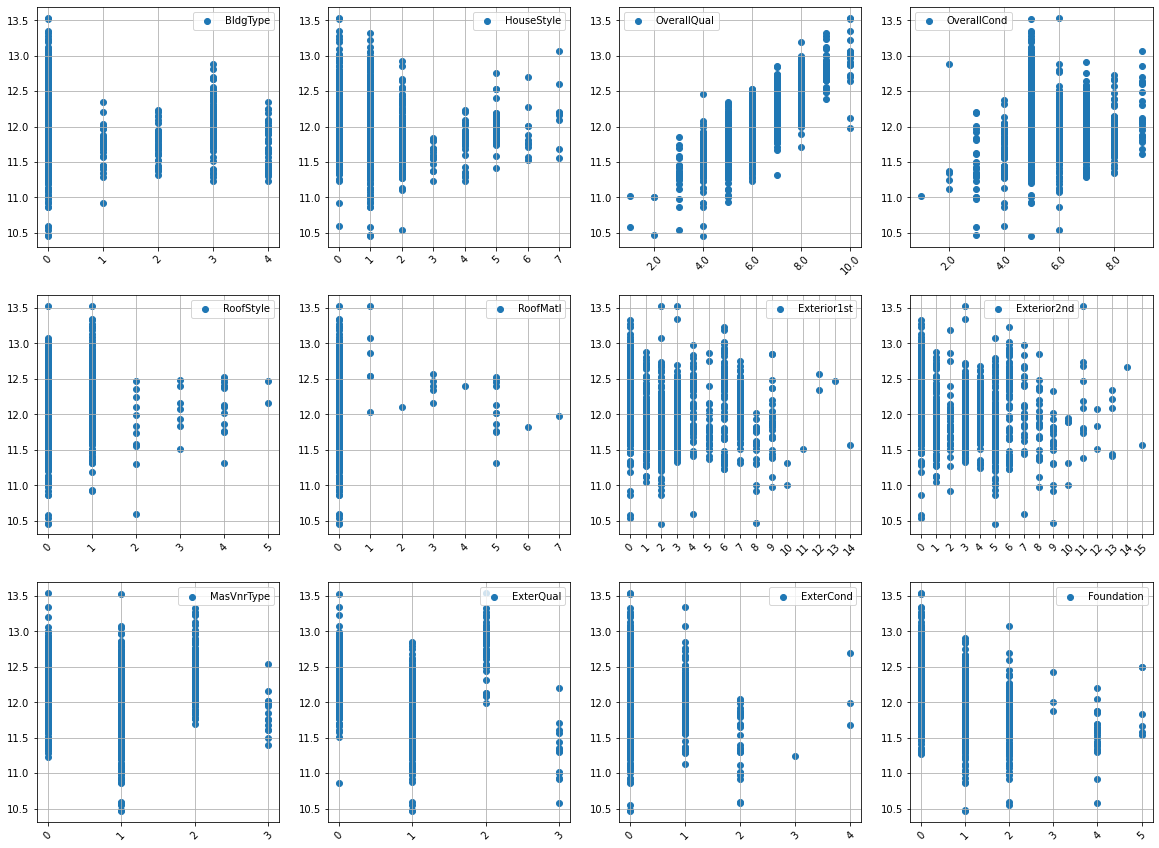

In [23]:
#Рисуем графики зависимости цены от категориальных столбцов _2
_, ax = plt.subplots(3, 4, figsize = (20, 15))
for i in range(3):
    for j in range(4):
        n_col = 12 + i*4 + j
        ax[i][j].scatter(df[:1460].loc[:, cat_columns].iloc[:, n_col], target, label = cat_columns[n_col])
        ax[i][j].set_xticklabels(ax[i][j].get_xticks(), rotation = 45)
        ax[i][j].legend()
        ax[i][j].grid()

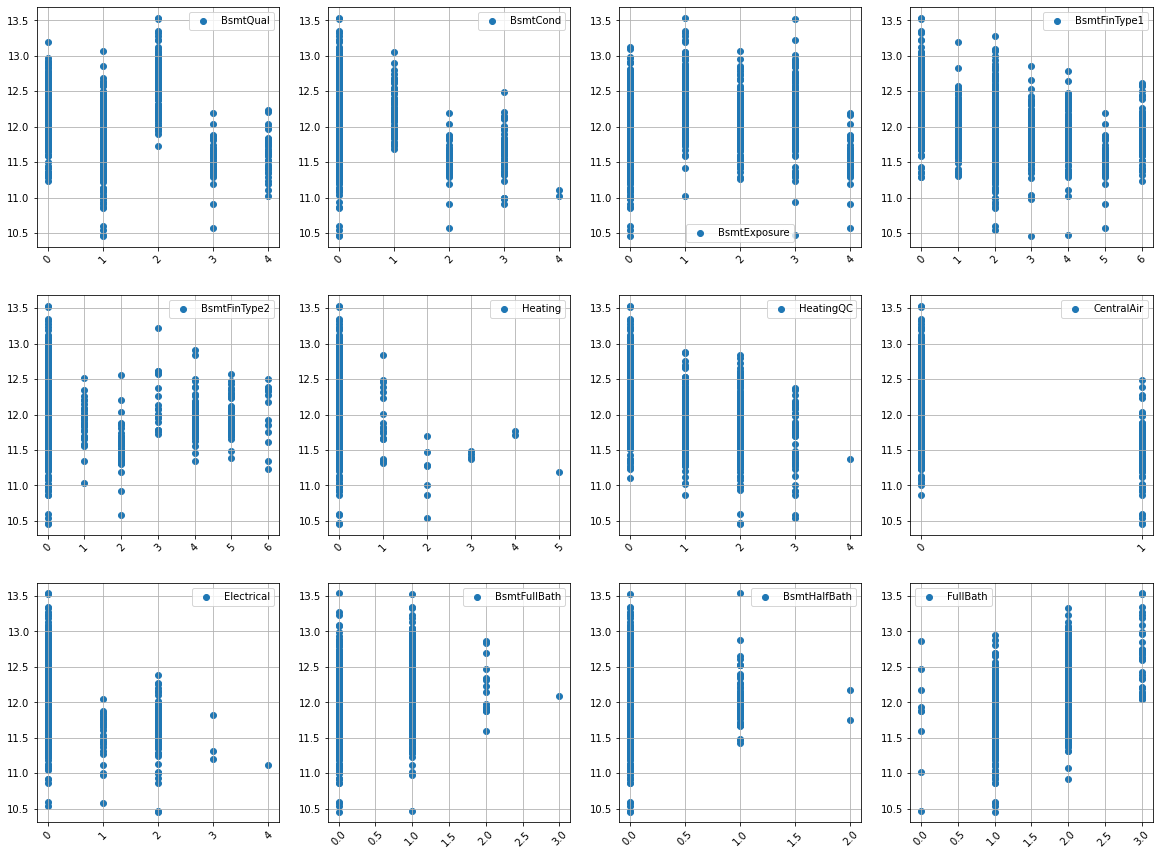

In [24]:
#Рисуем графики зависимости цены от категориальных столбцов _3
_, ax = plt.subplots(3, 4, figsize = (20, 15))
for i in range(3):
    for j in range(4):
        n_col = 24+i*4 + j
        ax[i][j].scatter(df[:1460].loc[:, cat_columns].iloc[:, n_col], target, label = cat_columns[n_col])
        ax[i][j].set_xticklabels(ax[i][j].get_xticks(), rotation = 45)
        ax[i][j].legend()
        ax[i][j].grid()

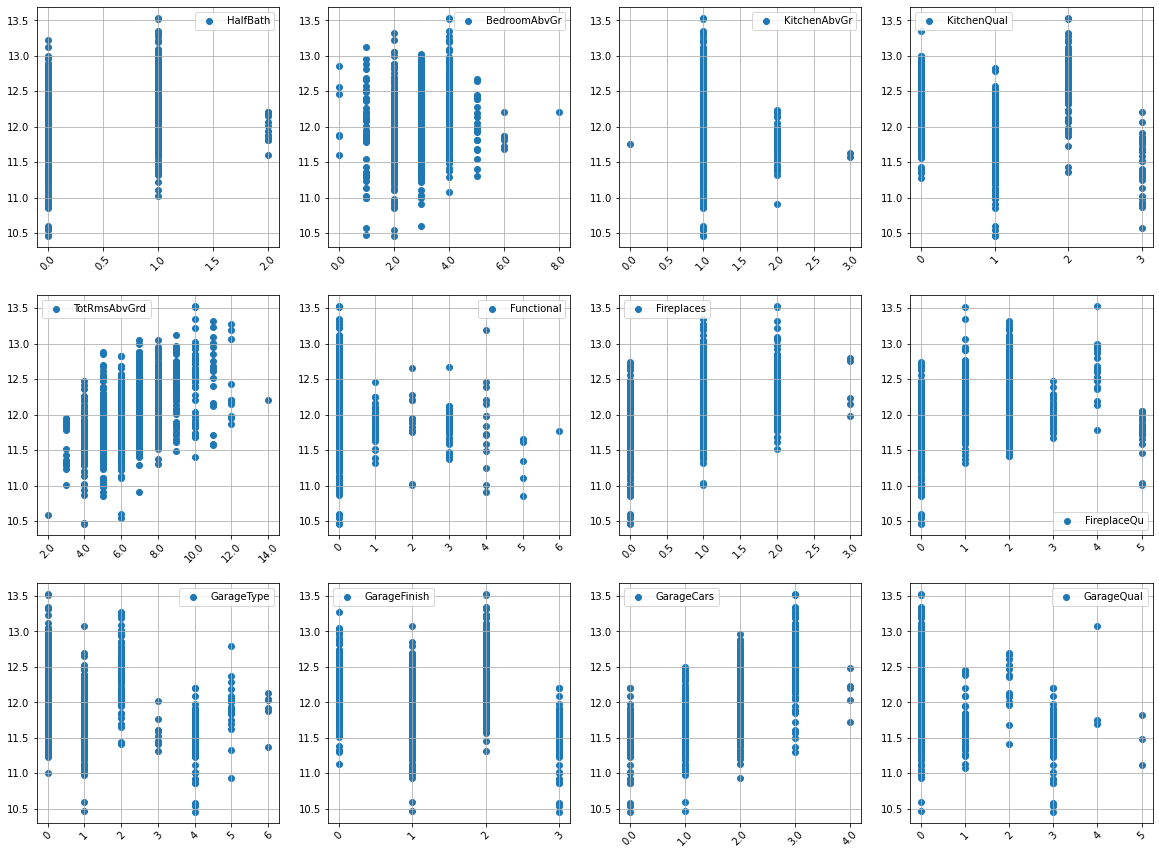

In [25]:
#Рисуем графики зависимости цены от категориальных столбцов _4
_, ax = plt.subplots(3, 4, figsize = (20, 15))
for i in range(3):
    for j in range(4):
        n_col = 36+i*4 + j
        ax[i][j].scatter(df[:1460].loc[:, cat_columns].iloc[:, n_col], target, label = cat_columns[n_col])
        ax[i][j].set_xticklabels(ax[i][j].get_xticks(), rotation = 45)
        ax[i][j].legend()
        ax[i][j].grid()

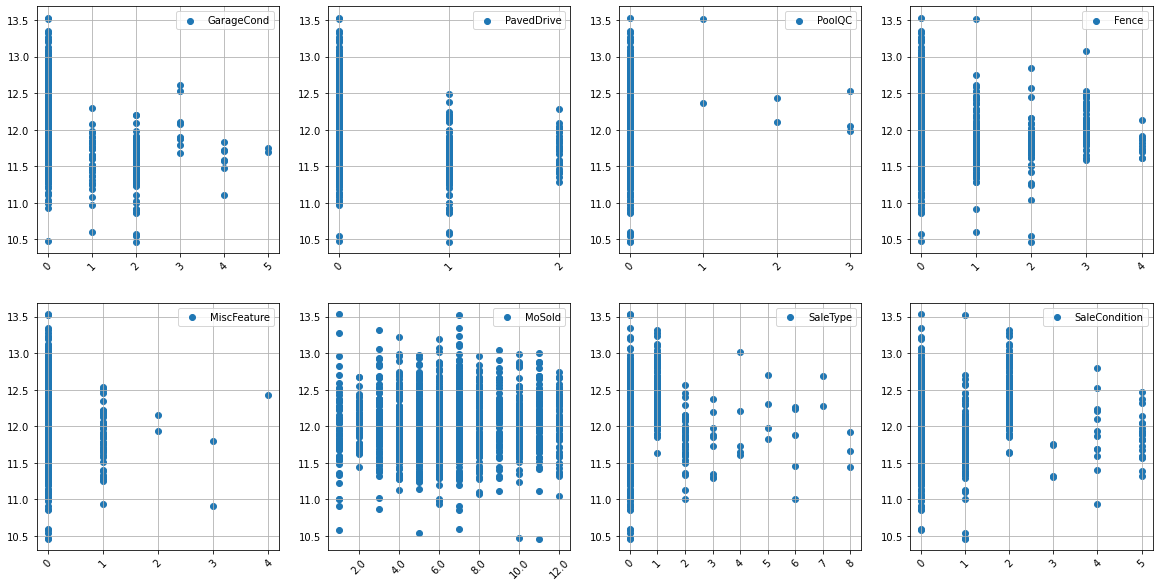

In [26]:
#Рисуем графики зависимости цены от категориальных столбцов _5
_, ax = plt.subplots(2, 4, figsize = (20, 10))
for i in range(2):
    for j in range(4):
        n_col = 48+i*4 + j
        ax[i][j].scatter(df[:1460].loc[:, cat_columns].iloc[:, n_col], target, label = cat_columns[n_col])
        ax[i][j].set_xticklabels(ax[i][j].get_xticks(), rotation = 45)
        ax[i][j].legend()
        ax[i][j].grid()

#### Кодирование категориальных фичей

In [27]:
# Функция label encode 
def EncodeColumn(column,labels):
    for i, label in enumerate(labels):
        df.loc[df[column] == label,column] =  i
    df[column] = df[column].astype(int)

In [29]:
#Список ordinal encode колонок
label_enc_columns = ['LotShape','LandSlope','OverallQual','ExterCond','BsmtQual',
                     'CentralAir','HeatingQC','KitchenQual','FireplaceQu','GarageFinish',
                     'GarageQual','GarageCond','Fence','PavedDrive', 'TotRmsAbvGrd',
                     'BsmtFullBath','BedroomAbvGr','OverallCond','BsmtHalfBath','GarageCars',
                     'FullBath','Fireplaces','KitchenAbvGr','ExterQual','HalfBath',
                     'BsmtCond']

In [30]:
# Ordinal encode 
EncodeColumn('LotShape',['Reg','IR1','IR2','IR3'])
EncodeColumn('LandSlope',['Gtl','Mod','Sev'])
EncodeColumn('ExterQual',['Ex','Gd','TA','Fa','Po'])
EncodeColumn('ExterCond',['Ex','Gd','TA','Fa','Po'])
EncodeColumn('BsmtQual',['Ex','Gd','TA','Fa','Po','None'])
EncodeColumn('BsmtCond',['Ex','Gd','TA','Fa','Po','None'])
EncodeColumn('CentralAir',['N','Y'])
EncodeColumn('HeatingQC',['Ex','Gd','TA','Fa','Po'])
EncodeColumn('KitchenQual',['Ex','Gd','TA','Fa','Po'])
EncodeColumn('FireplaceQu',['Ex','Gd','TA','Fa','Po','NA'])
EncodeColumn('GarageFinish',['Fin','RFn','Unf','None'])
EncodeColumn('GarageQual',['Ex','Gd','TA','Fa','Po','None'])
EncodeColumn('GarageCond',['Ex','Gd','TA','Fa','Po','None'])
EncodeColumn('GarageCond',['Y','P','N'])
EncodeColumn('Fence', ['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'NA'])
EncodeColumn('PavedDrive', ['Y', 'P', 'N'])

In [31]:
#Удаляем наиболее неинформативные колонки

drop_columns = ['PoolQC','Utilities','MoSold', 'Street']
df = df.drop(drop_columns, axis=1, errors='ignore')
for column in drop_columns:
    if column in cat_columns:
        cat_columns.remove(column)

In [32]:
#Список one-hot encode колонок
one_hot_columns = set(cat_columns)
one_hot_columns = list(one_hot_columns.difference(label_enc_columns))

In [33]:
#One-hot encode
df_onehot = pd.get_dummies(df, columns=one_hot_columns)

#### Кластеризация для создания новых фичей

In [34]:
cluster_df = df_onehot

In [35]:
import umap
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [36]:
RANDOM_STATE = 666

from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [37]:
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, perplexity=60, init='random')
ump = umap.UMAP(n_components=2, n_neighbors=8)

In [38]:
cluster_X = StandardScaler().fit_transform(cluster_df)

Text(0.5, 1.0, 'UMAP')

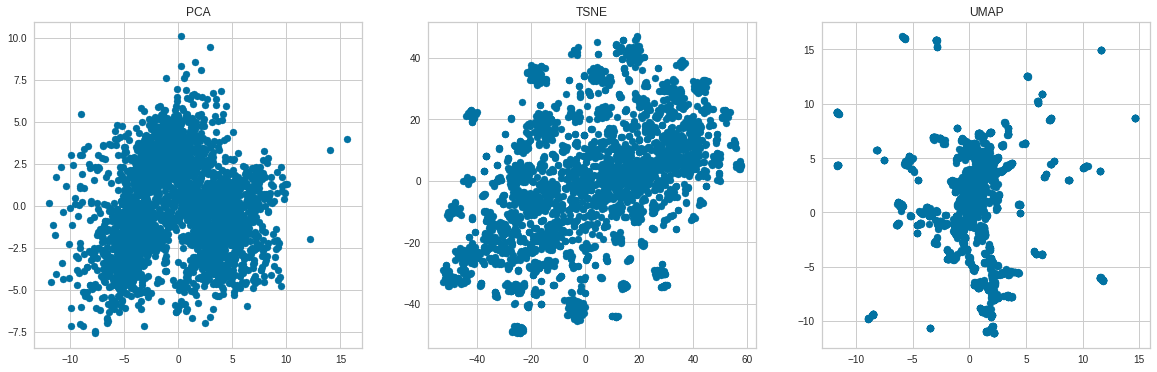

In [39]:
X_pca = pca.fit_transform(cluster_X)
X_tsne = tsne.fit_transform(cluster_X)
X_umap = ump.fit_transform(cluster_X)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))


ax1.scatter(X_pca[:, 0], X_pca[:, 1])
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1])
ax3.scatter(X_umap[:, 0], X_umap[:, 1])

ax1.set_title('PCA')
ax2.set_title('TSNE')
ax3.set_title('UMAP')

#### Кластеризация с вещественными фичами

In [40]:
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, perplexity=60, init='random')
ump = umap.UMAP(n_components=2, n_neighbors=8)

In [41]:
cluster_X = StandardScaler().fit_transform(cluster_df[num_columns])

Text(0.5, 1.0, 'UMAP')

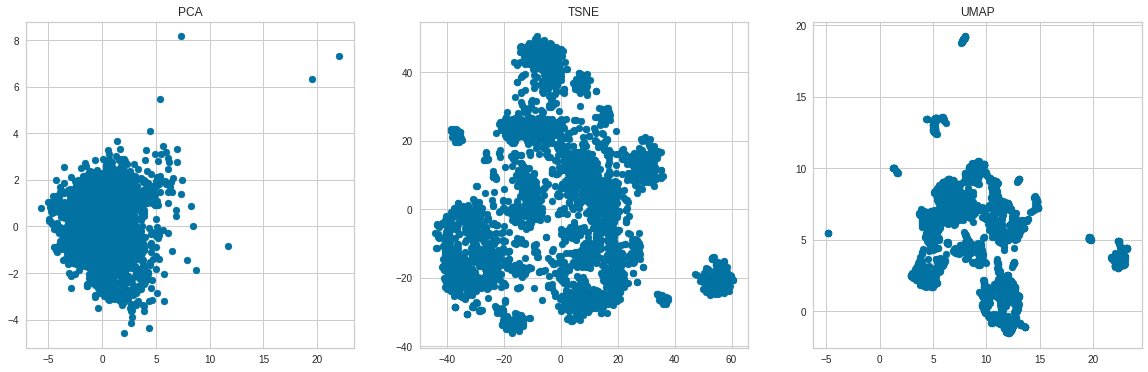

In [42]:
X_pca = pca.fit_transform(cluster_X)
X_tsne = tsne.fit_transform(cluster_X)
X_umap = ump.fit_transform(cluster_X)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))


ax1.scatter(X_pca[:, 0], X_pca[:, 1])
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1])
ax3.scatter(X_umap[:, 0], X_umap[:, 1])

ax1.set_title('PCA')
ax2.set_title('TSNE')
ax3.set_title('UMAP')

In [56]:
def plot_results(X: dict, models: dict):
    fig, ax = plt.subplots(3, 3, figsize=(20, 20))
    for i in np.arange(3):
        for j in np.arange(3):
            X_ = list(X.values())[i]
            model = list(models.values())[j].fit(X_)
            colors = model.labels_
            sil_score = silhouette_score(X_, model.labels_)
#            
            ax[i, j].scatter(X_[:, 0], X_[:, 1], c=colors, marker='.', s=10)
            ax[i, j].set_title(f'{list(X.keys())[i]}/{list(models.keys())[j]}: sil_score={sil_score:.3f}')

In [44]:
X_ = {
    'pca'  : X_pca,
    'tsne' : X_tsne,
    'umap' : X_umap
}

models = {
    'KMeans' : KMeans(10),
    'MinBatchKMeans' : MiniBatchKMeans(n_clusters= 12, random_state=RANDOM_STATE),
    'DBSCAN' : DBSCAN(eps=3, min_samples=15)
}

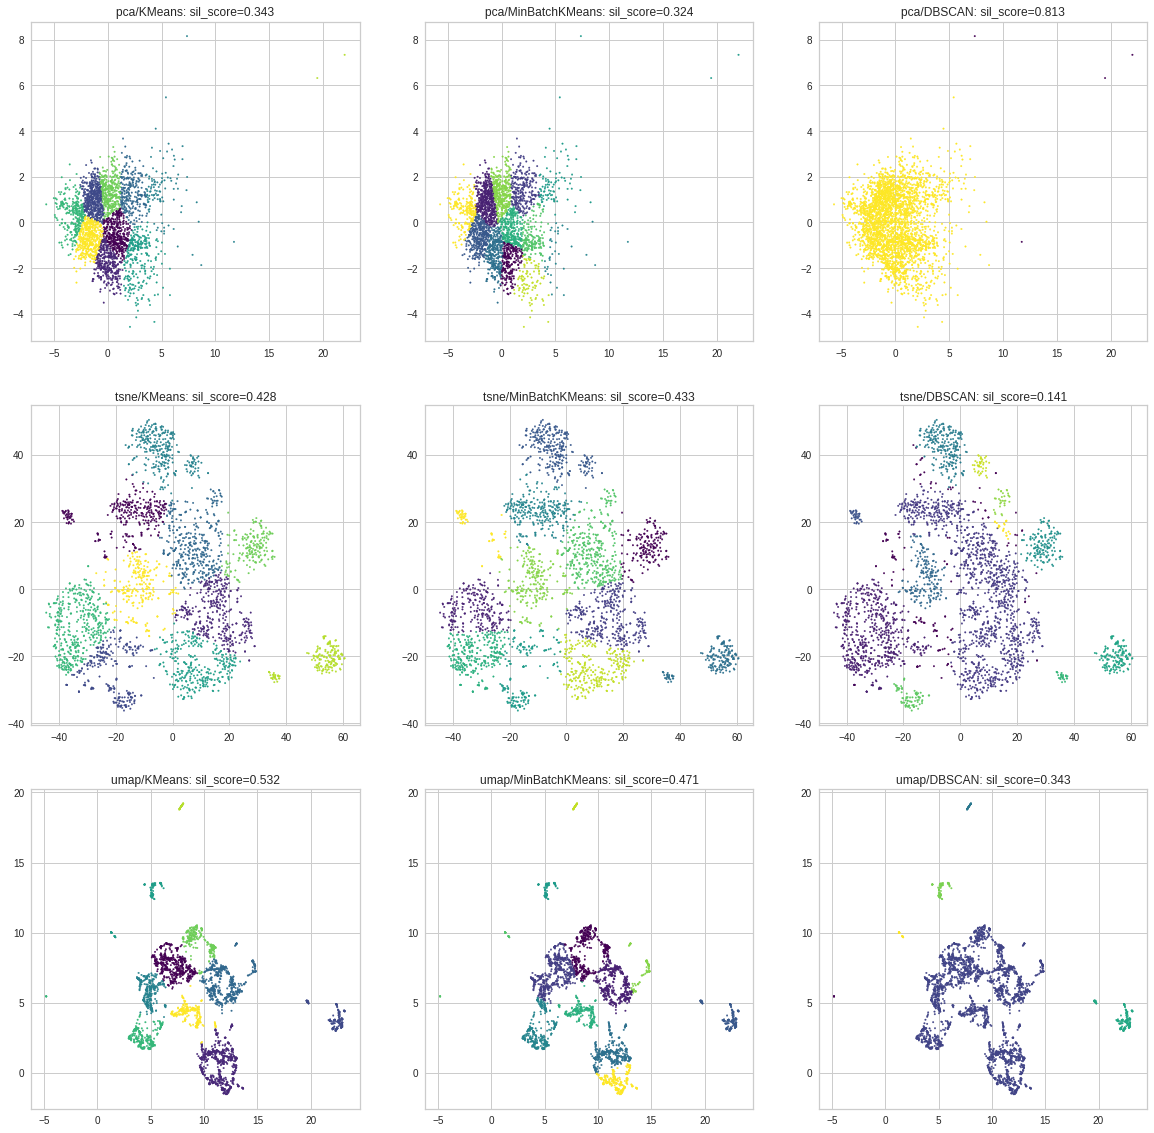

In [55]:
#plt.set_cmap('viridis')
plot_results(X_, models)

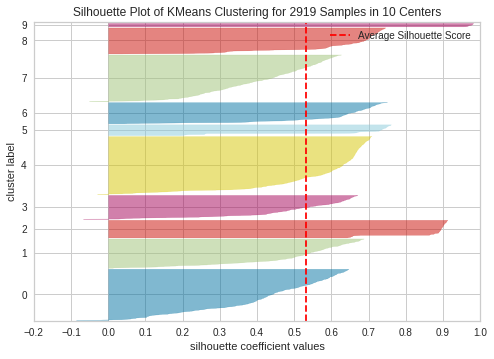

In [46]:
kmeans = KMeans(n_clusters=10, random_state=RANDOM_STATE)
visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
visualizer.fit(X_umap)
visualizer.show();

In [47]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_umap)

df_onehot['cluster_kmeans'] = kmeans.labels_

In [48]:
df_onehot = pd.get_dummies(df_onehot, columns=['cluster_kmeans'])

#### Кластеризицая с категориальными фичами

In [57]:
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, perplexity=60, init='random')
ump = umap.UMAP(n_components=2, n_neighbors=8)

In [58]:
cluster_X_1 = StandardScaler().fit_transform(cluster_df.drop(columns=num_columns))

Text(0.5, 1.0, 'UMAP')

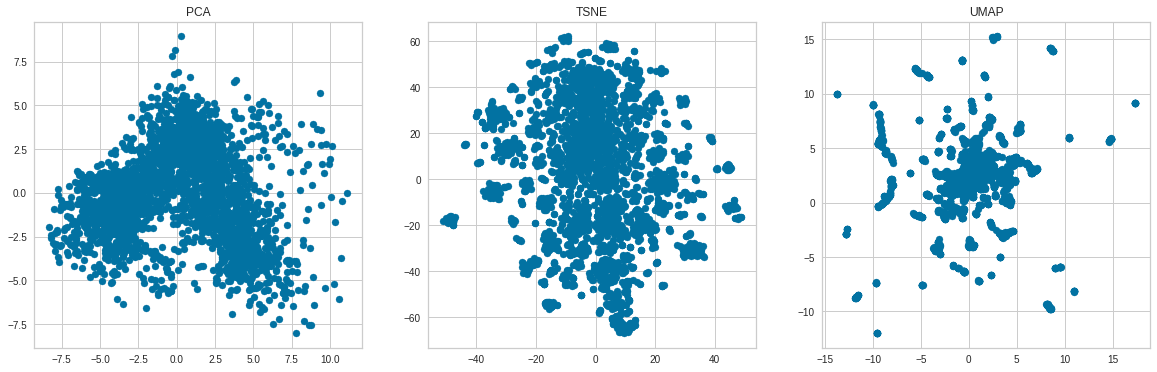

In [59]:
X_pca = pca.fit_transform(cluster_X_1)
X_tsne = tsne.fit_transform(cluster_X_1)
X_umap = ump.fit_transform(cluster_X_1)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))


ax1.scatter(X_pca[:, 0], X_pca[:, 1])
ax2.scatter(X_tsne[:, 0], X_tsne[:, 1])
ax3.scatter(X_umap[:, 0], X_umap[:, 1])

ax1.set_title('PCA')
ax2.set_title('TSNE')
ax3.set_title('UMAP')

In [60]:
X_ = {
    'pca'  : X_pca,
    'tsne' : X_tsne,
    'umap' : X_umap
}

models = {
    'KMeans' : KMeans(10),
    'MinBatchKMeans' : MiniBatchKMeans(n_clusters= 10, random_state=RANDOM_STATE),
    'DBSCAN' : DBSCAN(eps=0.5, min_samples=5)
}

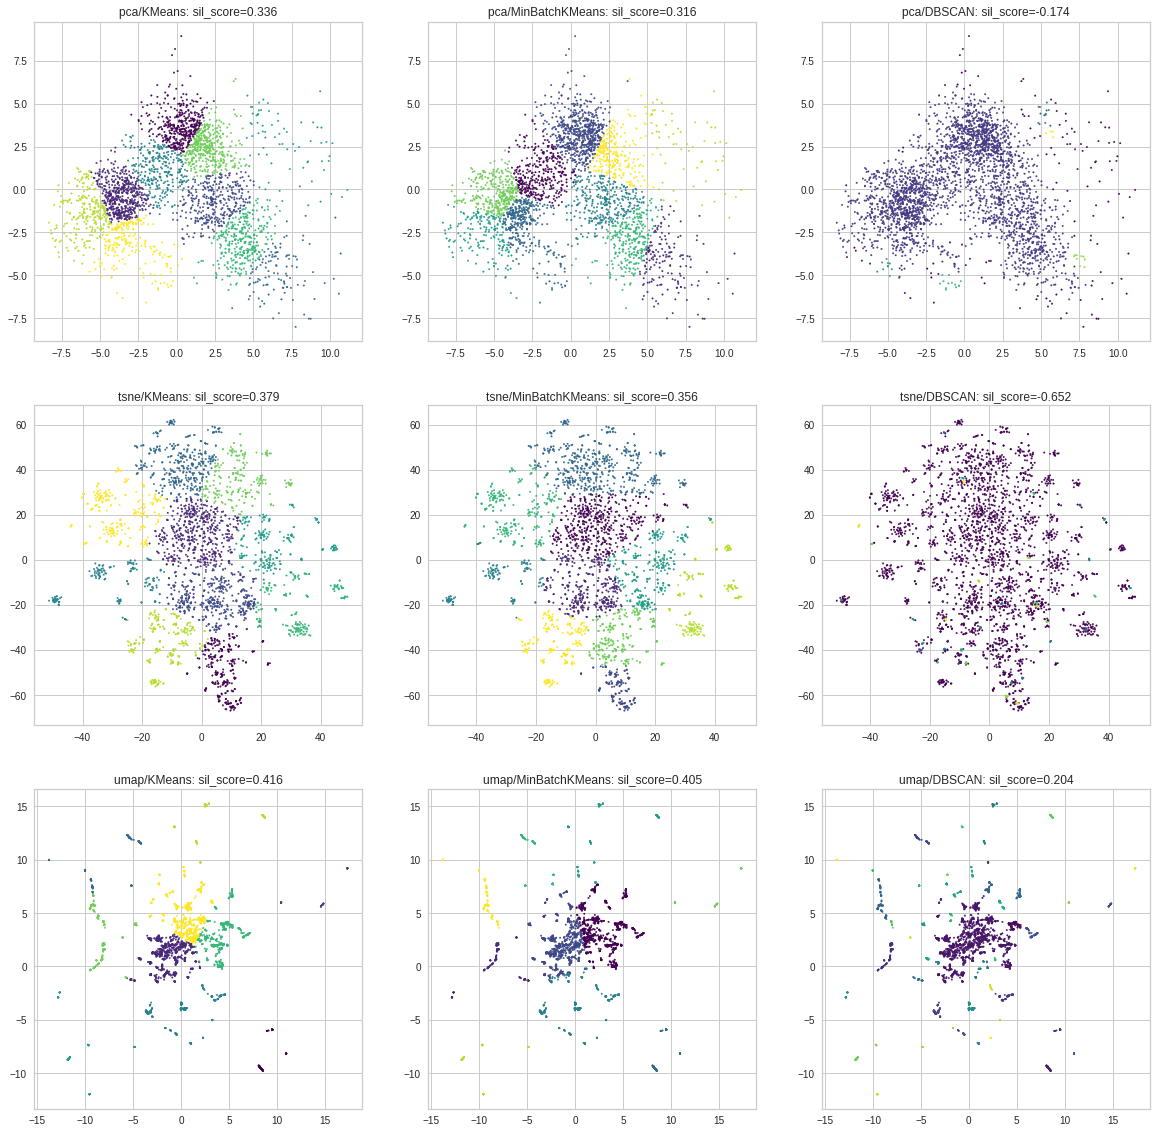

In [61]:
#plt.set_cmap('viridis')
plot_results(X_, models)

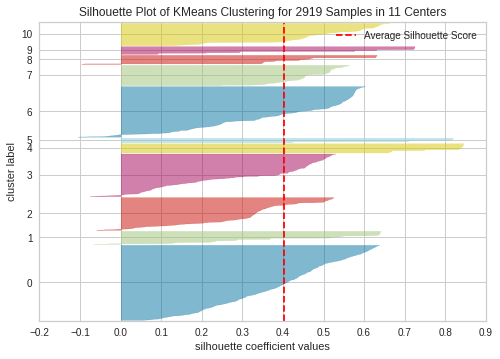

In [62]:
kmeans = KMeans(n_clusters=11, random_state=RANDOM_STATE)
visualizer = SilhouetteVisualizer(kmeans, colors = 'yellowbrick')
visualizer.fit(X_umap)
visualizer.show();

In [389]:
# kmeans = KMeans(n_clusters=10, random_state=42)
# kmeans.fit(X_umap)

# df_onehot['cluster_kmeans'] = kmeans.labels_

In [390]:
#df_onehot = pd.get_dummies(df_onehot, columns=['cluster_kmeans'])

#### StandartScaler, train, test, выбросы

In [63]:
#StandardScaler числовых колонок
X = df_onehot
y = target.reset_index().drop('Id',axis=1)

scaler = StandardScaler()
scal = scaler.fit_transform(X[num_columns])

X = X.drop(num_columns, axis=1)

X_nums = pd.DataFrame(scal, columns = num_columns)
X = pd.concat([X, X_nums], axis=1)

In [64]:
# Возвращаем обратно датасет на train и test
X_train = df_onehot.iloc[:len(target), :]
X_test = df_onehot.iloc[len(target):, :]

In [65]:
X_train[X_train['GrLivArea'] > 4000].index.to_list()

[523, 691, 1182, 1298]

In [66]:
#Чистим выбросы
drop_indexes = set()
drop_indexes.update(X_train[X_train['GrLivArea'] > 4000].index.to_list())

#Чтобы индексы совпадали
X_train = X_train.drop(drop_indexes,errors='ignore')
y = y.drop(drop_indexes, errors='ignore')

In [67]:
#Сколько признаков и объектов осталось 
X_train.shape, y.shape

((1456, 266), (1456, 1))

#### Анализ и отбор признаков

In [68]:
from sklearn.feature_selection import f_oneway

In [69]:
drop_columns_unimportant = set()

In [70]:
f_statistic, p_value = f_oneway(X_train[num_columns], y)
p_value_df = pd.DataFrame(p_value, X_train[num_columns].columns)
p_value_df.sort_values(by = 0, ascending=False).head(5)

,0
ScreenPorch,3.534793e-02
MiscVal,1.532401e-02
LowQualFinSF,1.446641e-06
EnclosedPorch,5.308565e-10
BsmtFinSF2,3.966813e-16


In [71]:
drop_columns_unimportant.update(('ScreenPorch', 'MiscVal'))

In [72]:
f_statistic, p_value = f_oneway(X_train, y)
p_value_df = pd.DataFrame(p_value, X_train.columns)
p_value_df.sort_values(by = 0, ascending=False).head(15)

,0
ScreenPorch,3.534793e-02
MiscVal,1.532401e-02
LowQualFinSF,1.446641e-06
EnclosedPorch,5.308565e-10
BsmtFinSF2,3.966813e-16
PoolArea,1.908210e-26
3SsnPorch,1.904598e-28
MasVnrArea,3.748097e-78
OpenPorchSF,3.088710e-83
WoodDeckSF,1.516105e-124


In [83]:
# Строили дерево и смотрели на важность признаков
# pd.DataFrame(zip(X_train.columns, best_rndfrst.feature_importances_)).set_index(0) \
# .sort_values(by=1, ascending=True)[:68]

In [80]:
# drop_columns_unimportant.update(pd.DataFrame(zip(X_train.columns, best_rndfrst.feature_importances_)).set_index(0) \
# .sort_values(by=1, ascending=True)[:68].index.to_list())

In [81]:
# X_train = X_train.drop(columns=drop_columns_unimportant)

In [82]:
# X_test = X_test.drop(columns=drop_columns_unimportant)

In [77]:
X_train.shape

(1456, 264)

### Строим модели

In [86]:
#Для выбора моделей и посмотреть результаты
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [87]:
# Сделать кросс-валидацию для вычисления метрики

def kfold_scores(model, X, y):
    "Функция возвращает mean_squared_error на train и valid"
    train_scores = []
    pred_scores = []

    kf = KFold(n_splits=5, random_state=666, shuffle=True)
    ##Кросс-валидация
    for train_idx, valid_idx in kf.split(X, y):

        #Обучим модель
        model.fit(X.iloc[train_idx], y.iloc[train_idx])

        #Запишем предсказания на обучающей выборке
        y_pred = model.predict(X.iloc[train_idx])

        #Запишем предсказания на валидационной выборке
        y_valid = model.predict(X.iloc[valid_idx])

        train_scores.append(mean_squared_error(y.iloc[train_idx], y_pred))
        pred_scores.append(mean_squared_error(y.iloc[valid_idx], y_valid))
        
    return train_scores, pred_scores

In [398]:
#Простые модели для ансамблей
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

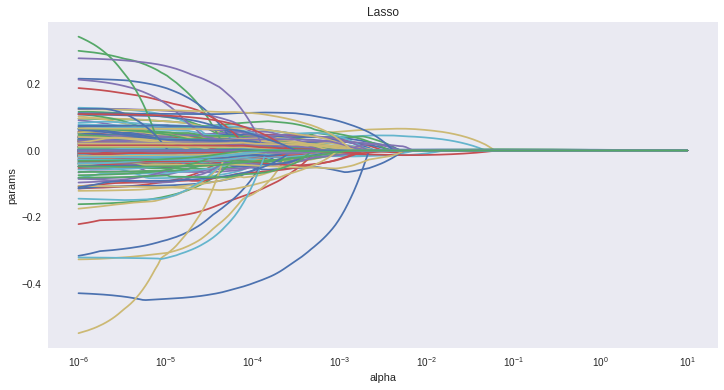

In [399]:
#Смотрим Lasso регуляризацию

n_alphas = 200
alphas = np.logspace(-6, 1, n_alphas)
coefs_lasso = []

#Обучаем линейные модели и записываем коэффициенты обучения в списки
for alpha in alphas:
    lasso = Lasso(alpha)
    lasso.fit(X_train, y)
    coefs_lasso.append(lasso.coef_)
    
# Рисуем изменение коэффициентов обучения при увеличении параметра модели (alpha)
_, ax = plt.subplots(figsize = (12, 6))
ax.plot(alphas, coefs_lasso)
ax.grid()
ax.set_xscale("log")
ax.set(
    xlabel = 'alpha',
    ylabel = 'params',
    title = 'Lasso'
);

#### Линейные модели (LinearRegression, Lasso, Ridge, ElasticNet)

In [553]:
#GridSearchCV on Lasso

lasso_params = {'alpha': np.linspace(0.01, 1, 30)}

lasso = Lasso()
cv_lasso = GridSearchCV(lasso, param_grid = lasso_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs=8)
cv_lasso.fit(X_train, y);

In [554]:
#проверим лучшую модель Lasso

best_lasso = cv_lasso.best_estimator_
train_scores, test_scores = kfold_scores(best_lasso, X_train, y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

Train mean score: 0.016036264575494515
Test mean score: 0.017100468606521663


In [402]:
# Сделали L1 регуляризацию и нашли важные линейные столбцы

coef = cv_lasso.best_estimator_.coef_ 
coef_df = pd.DataFrame(coef)

importance_columns = X_train.columns[coef_df[abs(coef_df) > 1e-9].sort_values(by = 0).head(26).index].to_list()

In [403]:
#GridSearchCV on LinearRegression

lr_params = {}

lr = LinearRegression()
cv_lr = GridSearchCV(lr, param_grid = lr_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs=8)
cv_lr.fit(X_train.loc[:,importance_columns], y);

In [404]:
#проверим лучшую модель линейной регрессии

best_lr = cv_lr.best_estimator_
train_scores, test_scores = kfold_scores(best_lr, X_train.loc[:,importance_columns], y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

Train mean score: 0.015394525322078223
Test mean score: 0.016637293148912356


In [405]:
#GridSearchCV on Ridge

ridge_params = {'alpha': np.linspace(0.01, 1, 30)}

ridge = Ridge()
cv_ridge = GridSearchCV(ridge, param_grid = ridge_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs=8)
cv_ridge.fit(X_train, y);

In [406]:
#проверим лучшую модель Ridge

best_ridge = cv_ridge.best_estimator_
train_scores, test_scores = kfold_scores(best_ridge, X_train, y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

Train mean score: 0.008104908404454025
Test mean score: 0.013825357412781278


In [407]:
#GridSearchCV on ElasticNet

elastic_params = {'alpha': np.linspace(0.01, 1, 30),
                'l1_ratio': np.linspace(0.01, 1, 30)}

elastic = ElasticNet()
cv_elastic = GridSearchCV(elastic, param_grid = elastic_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs=8)
cv_elastic.fit(X_train, y);

In [408]:
#проверим лучшую модель ElasticNet

best_elastic = cv_elastic.best_estimator_
train_scores, test_scores = kfold_scores(best_elastic, X_train, y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

Train mean score: 0.009483632909923807
Test mean score: 0.012703849518524307


In [409]:
#Записать baseline модель в файл
pred_y = np.exp(best_lr.predict(X_test.loc[:, importance_columns]))

test = pd.DataFrame({'Id': X_test.index.values + 1, 'SalePrice': np.ravel(pred_y)})
test = test.set_index('Id')
test.to_csv('pred_baseline_linear.csv')

#### Модели KNR, SVR и DecisionTreeRegressor

In [410]:
#GridSearchCV on KNR

knr_params = {'n_neighbors': np.arange(1, 10), 
              'weights': ['uniform'],
              'p': [1, 2]}

knr = KNeighborsRegressor()
cv_knr = GridSearchCV(knr, param_grid=knr_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs=8)
cv_knr.fit(X_train, y)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=8,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'p': [1, 2], 'weights': ['uniform']},
             scoring='neg_mean_squared_error')

In [411]:
#проверим лучшую модель KneighborsRegressor

best_knr = cv_knr.best_estimator_
train_scores, test_scores = kfold_scores(best_knr, X_train, y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

Train mean score: 0.029394083450767244
Test mean score: 0.042032205120472566


In [412]:
#GridSearchCV on SVR

svr_params = {'kernel': ['rbf', 'poly'],
              'degree': np.arange(1, 10)}

svr = SVR()
cv_svr = GridSearchCV(svr, param_grid=svr_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs=8)
cv_svr.fit(X_train, y.iloc[:,0])

GridSearchCV(cv=5, estimator=SVR(), n_jobs=8,
             param_grid={'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'kernel': ['rbf', 'poly']},
             scoring='neg_mean_squared_error')

In [413]:
#проверим лучшую модель SVR

best_svr = cv_svr.best_estimator_
train_scores, test_scores = kfold_scores(best_svr, X_train, y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

Train mean score: 0.03886970055219592
Test mean score: 0.04136805190188394


In [414]:
#GridSearchCV on DTR

dtr_params = {'max_depth': np.arange(2, 9), 
              'min_samples_split': np.arange(2, 6),
              'min_samples_leaf': np.arange(1, 10)
             }

dtr = DecisionTreeRegressor()
cv_dtr = GridSearchCV(dtr, param_grid=dtr_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs=8)
cv_dtr.fit(X_train, y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=8,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5])},
             scoring='neg_mean_squared_error')

In [415]:
#проверим лучшую модель DTR

best_dtr = cv_dtr.best_estimator_
train_scores, test_scores = kfold_scores(best_dtr, X_train, y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

Train mean score: 0.015381463812226132
Test mean score: 0.034697739550087925


#### Ансамбли

In [84]:
#Импортируем модели
from catboost import CatBoostRegressor, Pool
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [555]:
# Взяли лучшую модель из GridSearchCv
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1,
                                     reg_alpha=0.00006)

In [664]:
#проверим модель xgboost

train_scores, test_scores = kfold_scores(xgboost, X_train, y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

[16:02:27] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:39] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:02:49] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:00] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:03:11] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
Train mean score: 0.002089409672457272
Test mean score: 0.012894757063578826


In [419]:
#GridSearchCV on CatBoostRegressor without Pool

catb_params = {
    'iterations': [300, 500],
    'depth' : [6, 8, 11],
    'learning_rate': [0.06, 0.08, 0.04]
}

catb = CatBoostRegressor(loss_function='RMSE',min_data_in_leaf=9, verbose=0)
cv_catb = GridSearchCV(catb, param_grid=catb_params, scoring = 'neg_mean_squared_error', cv = 5, n_jobs=8)
cv_catb.fit(X_train, y)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7f82a7093520>,
             n_jobs=8,
             param_grid={'depth': [6, 8, 11], 'iterations': [300, 500],
                         'learning_rate': [0.06, 0.08, 0.04]},
             scoring='neg_mean_squared_error')

In [420]:
#проверим лучшую модель CatBoostRegressor without Pool

best_catb = cv_catb.best_estimator_
train_scores, test_scores = kfold_scores(best_catb, X_train, y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

Train mean score: 0.002208880612166985
Test mean score: 0.012997669818200382


In [421]:
#CatBoostRegressor with Pool

train_pool = Pool(df.iloc[:len(target), :], label =target, cat_features=pool_cat_columns)

catb_pool = CatBoostRegressor(depth= 8, iterations= 100, learning_rate= 0.09, loss_function='RMSE', verbose=0)
catb_pool.fit(train_pool)

In [422]:
#проверим лучшую модель CatBoostRegressor with Pool

train_scores, test_scores = kfold_scores(catb_pool, X_train, y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

Train mean score: 0.006049281268429135
Test mean score: 0.01576784300958734


In [85]:
#GridSearchCV  on RandomForest

rforest_params = {
    'n_estimators': np.arange(60,140,20),
    'max_depth': np.arange(1,8,2),
    'min_samples_leaf': np.arange(1,5,2)
}
rf = RandomForestRegressor()

cv_rndfrst = GridSearchCV(rf, param_grid=rforest_params, scoring='neg_mean_squared_error', cv=5, 
                  n_jobs=-1, verbose=0)
cv_rndfrst.fit(X_train, y['SalePrice'])

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([1, 3, 5, 7]),
                         'min_samples_leaf': array([1, 3]),
                         'n_estimators': array([ 60,  80, 100, 120])},
             scoring='neg_mean_squared_error')

In [88]:
#проверим лучшую модель RandomForestRegressor

best_rndfrst = cv_rndfrst.best_estimator_
train_scores, test_scores = kfold_scores(best_rndfrst, X_train, y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

Train mean score: 0.0084235524064835
Test mean score: 0.021267668491501475


In [425]:
#Записать randomforest модель в файл
pred_y = np.exp(best_rndfrst.predict(X_test))

test = pd.DataFrame({'Id': X_test.index.values + 1, 'SalePrice': np.ravel(pred_y)})
test = test.set_index('Id')
test.to_csv('pred_randomforest.csv')

In [426]:
#Cross-validation on Stacking

stacking_params = {
    'final_estimator': [LinearRegression(), Ridge(), DecisionTreeRegressor(), ElasticNet()]
}

stacking_linear = StackingRegressor(estimators= [
                                ('rndfrst',best_rndfrst),
                                #('Lasso',best_lasso),
                                #('Ridge',best_ridge),
                                ('Elastic',best_elastic),
                                ('KNR',best_knr),
                                #('SVR',best_svr),
                                ('catbst',best_catb)])

cv_stacking = GridSearchCV(stacking_linear, param_grid = stacking_params, scoring = 'neg_mean_squared_error', n_jobs=16)
cv_stacking.fit(X_train, y['SalePrice']);

In [427]:
#проверим лучшую модель Stacking

best_stacking = cv_stacking.best_estimator_
train_scores, test_scores = kfold_scores(best_stacking, X_train, y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

Train mean score: 0.004593023630511138
Test mean score: 0.011859470870148039


In [428]:
#Cross-validation on Stacking 2

stacking_params = {
    'final_estimator': [LinearRegression(), Ridge(), DecisionTreeRegressor(), ElasticNet()]
}

stacking_linear_2 = StackingRegressor(estimators= [
                                ('rndfrst',best_rndfrst),
                                ('Lasso',best_lasso),
                                ('Ridge',best_ridge),
                                ('Elastic',best_elastic),
                                ('KNR',best_knr),
                                ('SVR',best_svr),
                                ('catbst',best_catb)])

cv_stacking_2 = GridSearchCV(stacking_linear_2, param_grid = stacking_params, scoring = 'neg_mean_squared_error', n_jobs=-1)
cv_stacking_2.fit(X_train, y['SalePrice']);

In [429]:
#проверим лучшую модель Stacking 2

best_stacking_2 = cv_stacking_2.best_estimator_
train_scores, test_scores = kfold_scores(best_stacking_2, X_train, y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

Train mean score: 0.004519773929345722
Test mean score: 0.011896726373100122


In [430]:
cv_best_list = [cv_catb, cv_dtr, cv_elastic, cv_knr, cv_lasso, cv_ridge, cv_rndfrst, cv_svr]
for best in cv_best_list:
    print(best.best_params_, best.best_estimator_)

{'depth': 6, 'iterations': 500, 'learning_rate': 0.06} <catboost.core.CatBoostRegressor object at 0x7f82a708c5e0>
{'max_depth': 8, 'min_samples_leaf': 9, 'min_samples_split': 4} DecisionTreeRegressor(max_depth=8, min_samples_leaf=9, min_samples_split=4)
{'alpha': 0.01, 'l1_ratio': 0.01} ElasticNet(alpha=0.01, l1_ratio=0.01)
{'n_neighbors': 6, 'p': 1, 'weights': 'uniform'} KNeighborsRegressor(n_neighbors=6, p=1)
{'alpha': 0.01} Lasso(alpha=0.01)
{'alpha': 1.0} Ridge()
{'max_depth': 17, 'min_samples_leaf': 1, 'n_estimators': 110} RandomForestRegressor(max_depth=17, n_estimators=110)
{'degree': 1, 'kernel': 'rbf'} SVR(degree=1)


In [89]:
## Не хватило мощностей для быстрого обучения
### Не подходит
#Cross-validation on Stacking 3

# stacking_params = {
#     'final_estimator': [LinearRegression(), Ridge(), RandomForestRegressor(), Lasso()],

#     'rndfrst__n_estimators': [90, 110, 140], #RandomForest
#     'rndfrst__max_depth': [8, 16],
#     'rndfrst__min_samples_leaf': [1, 3],
    
#     'Lasso__alpha': [0.01, 0.02, 0.05], #Lasso
#     'Ridge__alpha': [0.5, 1], #Ridge
#     #'Elastic__alpha': np.linspace(0.01, 1, 5), # #Elastic
#     #'Elastic__l1_ratio': np.linspace(0.01, 1, 5),
    
#     'KNR__n_neighbors': [4, 6, 8], #KNR
#     #'KNR__weights': ['uniform'],
#     #'KNR__p': [1],
    
#     'SVR__kernel': ['rbf', 'poly'], #SVR
#     'SVR__degree': [1, 2, 3],
    
#     'catbst__iterations': [100, 300, 500], #CatBoost
#     'catbst__depth' : [6, 4],
#     'catbst__learning_rate': [0.06,0.08]

# }
# stacking_linear_3 = StackingRegressor(estimators= [
#                                 ('rndfrst',RandomForestRegressor()),
#                                 ('Lasso', Lasso()),
#                                 ('Ridge', Ridge()),
#                                 #('Elastic',best_elastic),
#                                 ('KNR', KNeighborsRegressor(weights='uniform', p=1)),
#                                 ('SVR', SVR()),
#                                 ('catbst',CatBoostRegressor(verbose=0))])

# cv_stacking_3 = GridSearchCV(stacking_linear_3, param_grid = stacking_params, scoring = 'neg_mean_squared_error', cv=5, n_jobs=8, verbose=0)
# cv_stacking_3.fit(X_train, y['SalePrice'])

In [ ]:
#проверим лучшую модель Stacking 3

best_stacking_3 = cv_stacking_3.best_estimator_
train_scores, test_scores = kfold_scores(best_stacking_3, X_train, y)
print(f'Train mean score: {np.mean(train_scores)}')
print(f'Test mean score: {np.mean(test_scores)}')

In [150]:
#Записать stacking модель в файл
pred_y = np.exp(best_stacking_3.predict(X_test))

test = pd.DataFrame({'Id': X_test.index.values + 1, 'SalePrice': np.ravel(pred_y)})
test = test.set_index('Id')
test.to_csv('pred_stacking_3.csv')

#### Meaning predictions of best models

In [766]:
# Взяли лучшие модели (выбраны с помощью GridSearchCV)
best_2_catb = CatBoostRegressor(depth=6, iterations=600, learning_rate=0.06, verbose=0)
best_2_rf  = RandomForestRegressor(max_depth=1, min_samples_leaf=15, n_estimators=10)
best_2_svr = SVR(epsilon=0.0069519279617756054)
best_2_knn = KNeighborsRegressor(n_neighbors=6, p=1)

lightgbm = LGBMRegressor(objective='regression',
                        num_leaves=4,
                        learning_rate=0.01,
                        n_estimators=5000,
                        max_bin=200,
                        bagging_fraction=0.75,
                        bagging_freq=5,
                        bagging_seed=7,
                        feature_fraction=0.2,
                        feature_fraction_seed=7,
                        verbose=-1,
                        )

In [783]:
#stacking without ensembles 
stacking_2_linear = StackingRegressor(estimators= [
                                    ('rndfrst',best_2_rf),
                                    ('Lasso',best_lasso),
                                    ('Ridge',best_ridge),
                                    ('Elastic',best_elastic),
                                    #('KNR',best_2_knn),
                                    #('SVR',best_2_svr),
                                    # ('xgboost',xgboost),
                                    #('catbst',best_2_catb)
                                    ],
                                    final_estimator=LinearRegression())

In [784]:
#stacking fit
stacking_2_linear.fit(X_train, y)

StackingRegressor(estimators=[('rndfrst',
                               RandomForestRegressor(max_depth=1,
                                                     min_samples_leaf=15,
                                                     n_estimators=10)),
                              ('Lasso', Lasso(alpha=0.01)), ('Ridge', Ridge()),
                              ('Elastic',
                               ElasticNet(alpha=0.01, l1_ratio=0.01)),
                              ('catbst',
                               <catboost.core.CatBoostRegressor object at 0x7f824d559430>)],
                  final_estimator=LinearRegression())

In [777]:
#stacking with catboost
stacking_2_cat = StackingRegressor(estimators= [
                                ('rndfrst',best_2_rf),
                                ('Lasso',best_lasso),
                                ('Ridge',best_ridge),
                                ('Elastic',best_elastic),
                                #('KNR',best_2_knn),
                                #('SVR',best_2_svr),
                                # ('xgboost',xgboost),
                                ('catbst',best_2_catb)],
                                final_estimator=best_catb)

In [778]:
#stack fit
stacking_2_cat.fit(X_train, y)

StackingRegressor(estimators=[('rndfrst',
                               RandomForestRegressor(max_depth=1,
                                                     min_samples_leaf=15,
                                                     n_estimators=10)),
                              ('Lasso', Lasso(alpha=0.01)), ('Ridge', Ridge()),
                              ('Elastic',
                               ElasticNet(alpha=0.01, l1_ratio=0.01)),
                              ('catbst',
                               <catboost.core.CatBoostRegressor object at 0x7f825f645d90>)],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f82a708c5e0>)

In [780]:
#fit best models
best_2_catb.fit(X_train, y)
best_2_rf.fit(X_train, y)
best_2_svr.fit(X_train, y)
xgboost.fit(X_train, y)
best_elastic.fit(X_train, y)

[16:41:42] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


ElasticNet(alpha=0.01, l1_ratio=0.01)

In [785]:
#get predictions
pred_stacking_2_linear = stacking_2_linear.predict(X_test)
pred_stacking_2_cat = stacking_2_cat.predict(X_test)
pred_elastic = best_elastic.predict(X_test)
pred_xgboost = xgboost.predict(X_test)
pred_catb = best_2_catb.predict(X_test)
pred_svr = best_2_svr.predict(X_test)

In [880]:
#get weighted sum for best score
pred_blend_2 = \
0.24 * pred_stacking_2_linear + \
0.25 * pred_stacking_2_cat + \
#0.00000*pred_elastic + \
0.5*pred_catb# + \
#0.00*pred_xgboost + \
#0.00*pred_svr

In [831]:
#Записать weighted sum модель в файл
pred_y = np.exp(pred_blend_2)

test = pd.DataFrame({'Id': X_test.index.values + 1, 'SalePrice': np.ravel(pred_y)})
test = test.set_index('Id')
test.to_csv('pred_stacking_blend_9.csv')

In [92]:
!pip freeze > requirements.txt